In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.formula.api as smf

In [2]:
import xlrd

In [3]:
cust_behavior=pd.read_excel(r'C:/Users/Ankita/Documents/ML Class Notes_Alabs/CaseStudy_practiceProjects/CustomerBehaviorData.xlsx')

In [4]:
cust_behavior.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [5]:
credit_cc=pd.read_excel(r'C:/Users/Ankita/Documents/ML Class Notes_Alabs/CaseStudy_practiceProjects/CreditConsumptionData.xlsx')

In [6]:
credit_cc

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0
...,...,...
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN


In [7]:
df=pd.merge(left=cust_behavior, right= credit_cc, how="left", left_on="ID", right_on="ID")

In [8]:
df.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84,13434.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69,449.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90,11968.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61,32029.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89,16394.0


In [9]:
customer_demog=pd.read_excel(r'C:/Users/Ankita/Documents/ML Class Notes_Alabs/CaseStudy_practiceProjects/CustomerDemographics.xlsx')

In [10]:
customer_demog

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0


In [11]:
df_final=pd.merge(left=df, right= customer_demog, how="left", left_on="ID", right_on="ID")

In [12]:
df_final.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,13434.0,current,M,30,MEDIUM,7.0,5,956.0,1,20.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,449.0,current,M,37,LOW,10.2,8,966.0,1,5.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,11968.0,current,M,33,MEDIUM,3.9,3,505.0,1,15.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,32029.0,current,M,63,LOW,25.8,6,631.0,0,15.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,16394.0,saving,M,33,MEDIUM,6.5,7,698.0,0,9.0


In [13]:
df_final.drop('ID',axis=1,inplace=True)

In [14]:
df_final.shape

(20000, 48)

In [15]:
df_final['cc_cons'].isnull().sum()

5000

In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons_apr                   20000 non-null  float64
 1   dc_cons_apr                   20000 non-null  float64
 2   cc_cons_may                   19999 non-null  float64
 3   dc_cons_may                   20000 non-null  float64
 4   cc_cons_jun                   20000 non-null  float64
 5   dc_cons_jun                   19999 non-null  float64
 6   cc_count_apr                  19999 non-null  float64
 7   cc_count_may                  20000 non-null  int64  
 8   cc_count_jun                  20000 non-null  int64  
 9   dc_count_apr                  20000 non-null  int64  
 10  dc_count_may                  20000 non-null  int64  
 11  dc_count_jun                  20000 non-null  int64  
 12  card_lim                      20000 non-null  int64  
 13  p

# Checking Missing values

In [18]:
df_final.isnull().sum()

cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       2
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    1
credit_count_apr                   0
max_credit_amount_apr              0
debit_amount_may                   0
c

In [19]:
#df = df.select_dtypes(include='int64')
#df_numerical = df.select_dtypes(exclude=’object’)
#df_numerical_cols = df_numerical.columns.tolist()
#df_categorical_cols = df_categorical.columns.tolist()

# Splitting the dataset into train and test based on missing values

In [30]:
df_train = df_final[df_final['cc_cons'].notnull()]
df_train

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,...,13434.0,current,M,30,MEDIUM,7.0,5,956.0,1,20.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,...,449.0,current,M,37,LOW,10.2,8,966.0,1,5.0
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,...,11968.0,current,M,33,MEDIUM,3.9,3,505.0,1,15.0
3,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,...,32029.0,current,M,63,LOW,25.8,6,631.0,0,15.0
4,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,...,16394.0,saving,M,33,MEDIUM,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,...,4263.0,current,F,53,LOW,13.2,9,653.0,1,20.0
14996,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,...,11019.0,current,M,44,MEDIUM,2.4,9,535.0,1,2.0
14997,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,...,404227.0,current,M,37,MEDIUM,3.4,9,464.0,1,8.0
14998,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,...,28813.0,current,M,220,MEDIUM,40.0,10,536.0,1,3.0


In [31]:
df_test = df_final[df_final['cc_cons'].isnull()].drop("cc_cons",axis=1)
df_test

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,...,1170.49,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
15001,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,...,16447.45,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
15002,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,24,...,2622.28,current,M,53,LOW,33.0,10,324.0,1,15.0
15003,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,...,340.79,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
15004,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,...,2812.20,current,M,62,LOW,12.6,9,505.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,...,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,...,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,...,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,...,59.29,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


# Missing value Treatment and coding categorical variables

In [32]:
def missing_imp(x):
    if x.dtype=='object':
        x=x.fillna(x.mode()[0])
    else:
        x=x.fillna(x.mean())
    return x

In [33]:
df_train=df_train.apply(missing_imp)
df_test=df_test.apply(missing_imp)

In [34]:
df_test.isnull().sum()

cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            0
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3                    0
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 0
credit_count_apr                0
max_credit_amount_apr           0
debit_amount_may                0
credit_amount_may               0
credit_count_may                0
debit_count_ma

Splitting the dataset into numerical and categorical dataset to treat categorical variables

In [104]:
df_num_train=df_train.select_dtypes(exclude='object')
df_num_test=df_test.select_dtypes(exclude='object')

In [105]:
df_num_train

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,...,18,19947.00,3448.84,13434.0,30,7.0,5,956.0,1,20.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,...,49,20585.00,3812.69,449.0,37,10.2,8,966.0,1,5.0
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,...,49,13950.00,9432.90,11968.0,33,3.9,3,505.0,1,15.0
3,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,...,37,37018.00,144.61,32029.0,63,25.8,6,631.0,0,15.0
4,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,...,15,24274.00,1887.89,16394.0,33,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,...,8,82851.00,78966.76,4263.0,53,13.2,9,653.0,1,20.0
14996,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,...,18,118110.47,4762.10,11019.0,44,2.4,9,535.0,1,2.0
14997,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,...,73,49545.00,2877.33,404227.0,37,3.4,9,464.0,1,8.0
14998,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,...,80,16130.00,13006.84,28813.0,220,40.0,10,536.0,1,3.0


In [106]:
df_num_train.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons',
       'age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')

In [107]:
df_num_train.drop(['NetBanking_Flag','Tenure_with_Bank'],axis=1,inplace=True)
df_num_test.drop(['NetBanking_Flag','Tenure_with_Bank'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [108]:
df_num_train.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons',
       'age', 'Emp_Tenure_Years', 'region_code',
       'Avg_days_between_transaction'],
      dtype='object')

In [109]:
df_cat_train=df_train.select_dtypes(include='object')
df_cat_test=df_test.select_dtypes(include='object')

In [110]:
df_cat_test

,loan_enq,account_type,gender,Income
15000,Y,current,M,MEDIUM
15001,Y,current,M,MEDIUM
15002,Y,current,M,LOW
15003,Y,current,M,MEDIUM
15004,Y,current,M,LOW
...,...,...,...,...
19995,Y,current,M,MEDIUM
19996,Y,current,M,MEDIUM
19997,Y,current,M,HIGH
19998,Y,current,M,MEDIUM


In [111]:
df_cat_train

,loan_enq,account_type,gender,Income
0,Y,current,M,MEDIUM
1,Y,current,M,LOW
2,Y,current,M,MEDIUM
3,Y,current,M,LOW
4,Y,saving,M,MEDIUM
...,...,...,...,...
14995,Y,current,F,LOW
14996,Y,current,M,MEDIUM
14997,Y,current,M,MEDIUM
14998,Y,current,M,MEDIUM


In [112]:
df_cat_train = pd.get_dummies(df_cat_train)
df_cat_test=pd.get_dummies(df_cat_test)

In [113]:
df_cat_train.drop('loan_enq_Y',axis=1,inplace=True)

In [114]:
df_cat_test.drop('loan_enq_Y',axis=1,inplace=True)

In [116]:
cat_vars=df_train[['NetBanking_Flag','Tenure_with_Bank']]
cat_vars_tst=df_test[['NetBanking_Flag','Tenure_with_Bank']]

In [117]:
num_vars

0        1
1        1
2        1
3        1
4        1
        ..
14995    1
14996    1
14997    1
14998    1
14999    1
Name: loan_enq, Length: 15000, dtype: int64

In [118]:
df_cat_train=pd.concat([df_cat_train, cat_vars], axis=1)

In [119]:
df_cat_test=pd.concat([df_cat_test, cat_vars_tst], axis=1)

In [120]:
df_cat_train

,account_type_current,account_type_saving,gender_F,gender_M,Income_HIGH,Income_LOW,Income_MEDIUM,NetBanking_Flag,Tenure_with_Bank
0,1,0,0,1,0,0,1,1,5
1,1,0,0,1,0,1,0,1,8
2,1,0,0,1,0,0,1,1,3
3,1,0,0,1,0,1,0,0,6
4,0,1,0,1,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...
14995,1,0,1,0,0,1,0,1,9
14996,1,0,0,1,0,0,1,1,9
14997,1,0,0,1,0,0,1,1,9
14998,1,0,0,1,0,0,1,1,10


In [121]:
df_cat_test

,account_type_current,account_type_saving,gender_F,gender_M,Income_HIGH,Income_LOW,Income_MEDIUM,NetBanking_Flag,Tenure_with_Bank
15000,1,0,0,1,0,0,1,1,4
15001,1,0,0,1,0,0,1,0,6
15002,1,0,0,1,0,1,0,1,10
15003,1,0,0,1,0,0,1,1,5
15004,1,0,0,1,0,1,0,1,9
...,...,...,...,...,...,...,...,...,...
19995,1,0,0,1,0,0,1,0,1
19996,1,0,0,1,0,0,1,1,7
19997,1,0,0,1,1,0,0,1,8
19998,1,0,0,1,0,0,1,0,4


In [ ]:
num_vars=df_train['loan_enq'].replace(to_replace ="Y",value=1)
num_vars_tst=df_test['loan_enq'].replace(to_replace ="Y",value=1)

In [122]:
df_num_train=pd.concat([df_num_train, num_vars], axis=1)
df_num_test=pd.concat([df_num_test, num_vars_tst], axis=1)

In [124]:
df_num_train

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,age,Emp_Tenure_Years,region_code,Avg_days_between_transaction,loan_enq
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,...,2,18,19947.00,3448.84,13434.0,30,7.0,956.0,20.0,1
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,...,3,49,20585.00,3812.69,449.0,37,10.2,966.0,5.0,1
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,...,47,49,13950.00,9432.90,11968.0,33,3.9,505.0,15.0,1
3,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,...,3,37,37018.00,144.61,32029.0,63,25.8,631.0,15.0,1
4,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,...,2,15,24274.00,1887.89,16394.0,33,6.5,698.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,...,14,8,82851.00,78966.76,4263.0,53,13.2,653.0,20.0,1
14996,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,...,11,18,118110.47,4762.10,11019.0,44,2.4,535.0,2.0,1
14997,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,...,4,73,49545.00,2877.33,404227.0,37,3.4,464.0,8.0,1
14998,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,...,3,80,16130.00,13006.84,28813.0,220,40.0,536.0,3.0,1


# Outlier Treatment

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


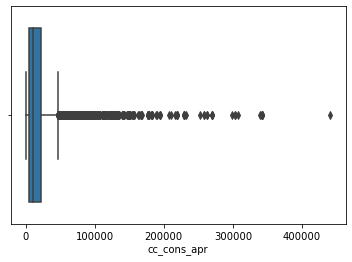

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


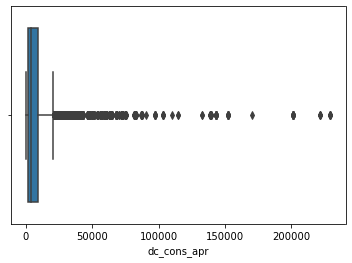

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


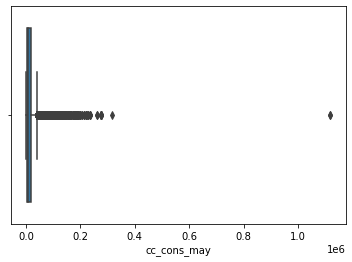

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


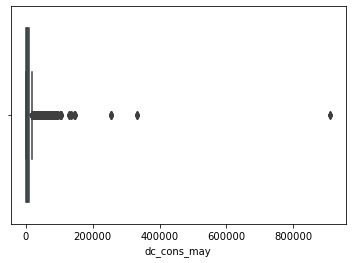

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


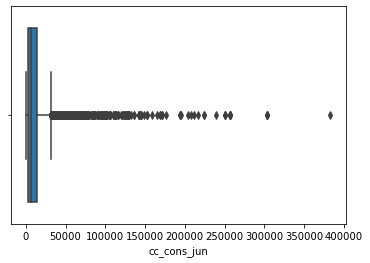

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


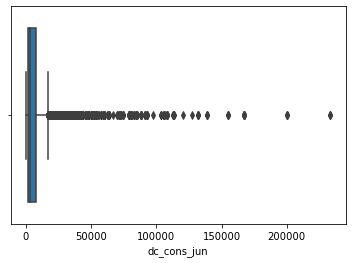

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


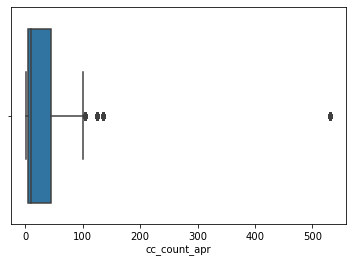

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


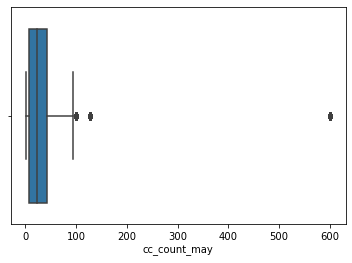

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


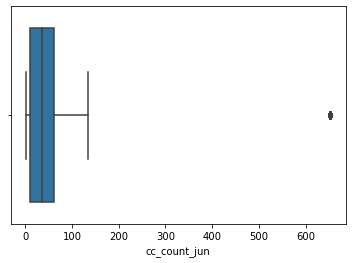

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


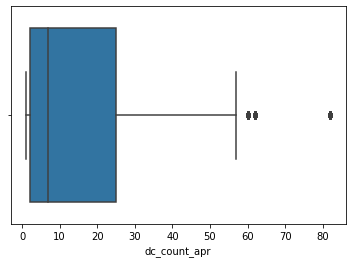

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


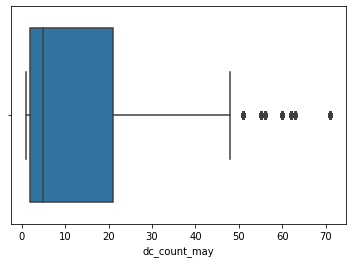

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


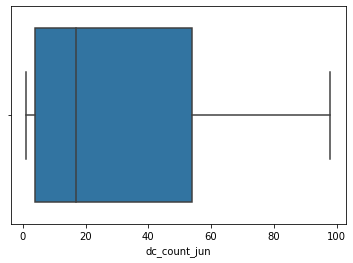

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


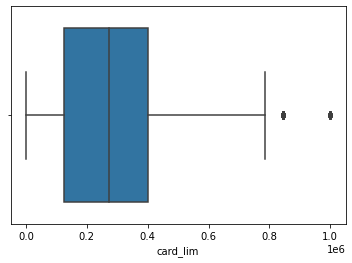

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


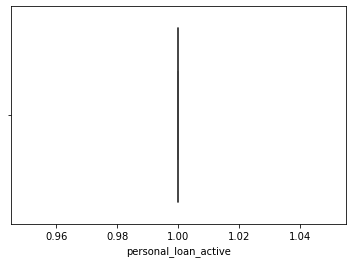

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


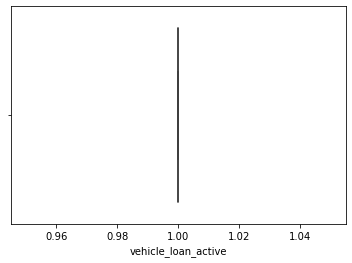

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


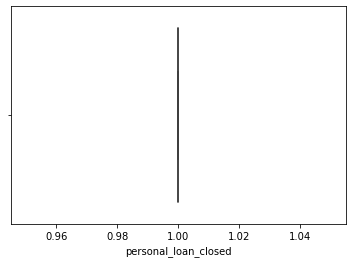

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


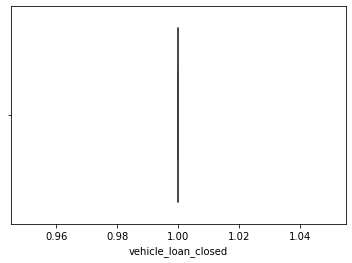

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


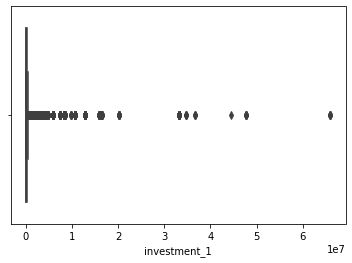

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


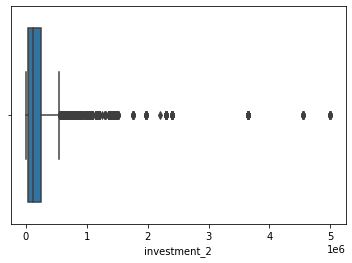

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


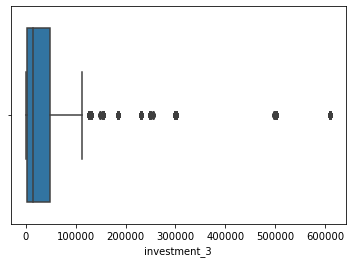

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


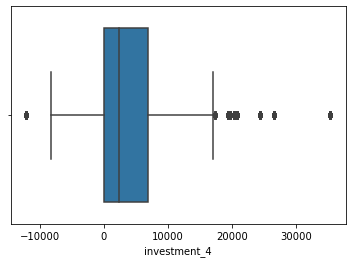

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


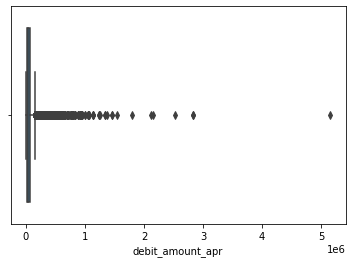

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


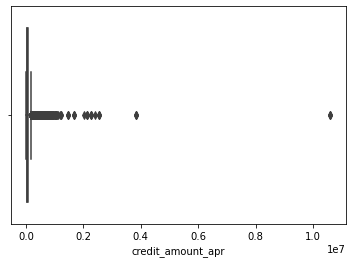

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


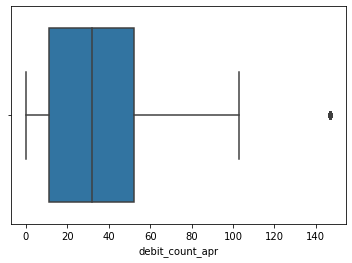

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


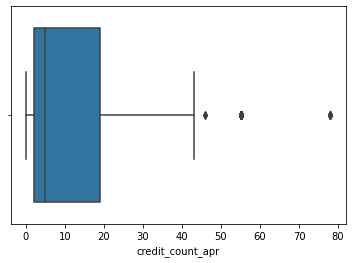

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


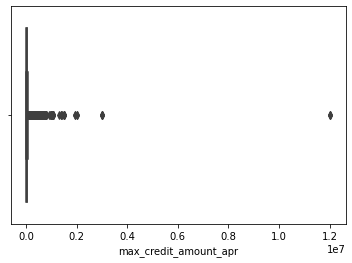

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


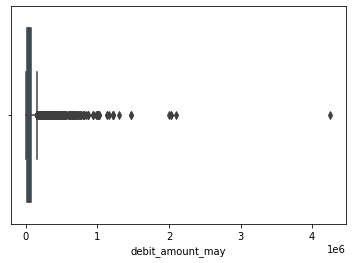

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


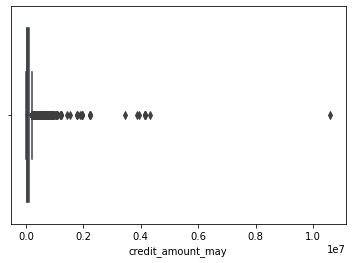

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


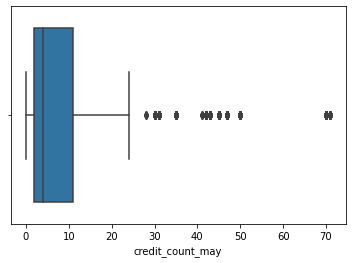

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


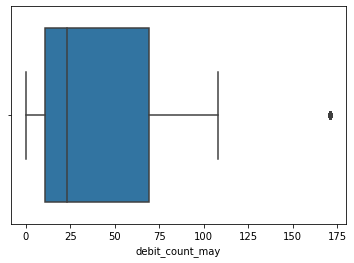

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


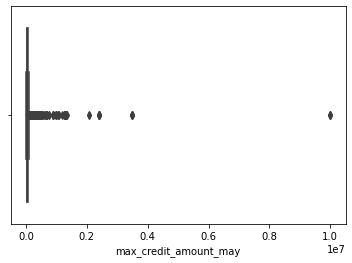

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


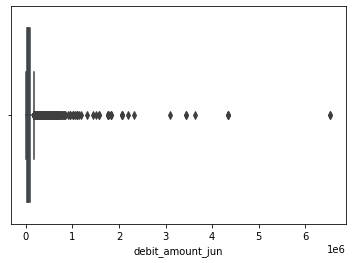

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


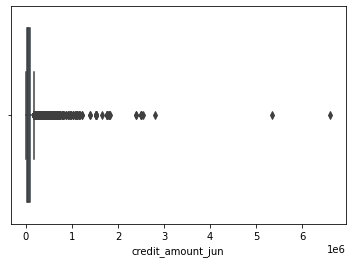

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


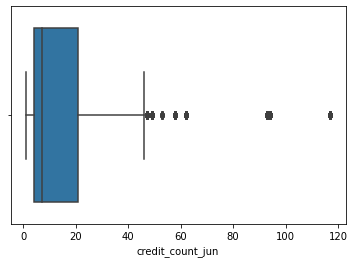

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


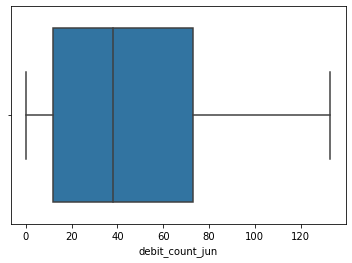

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


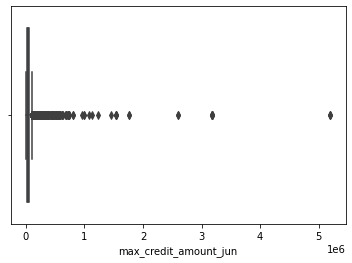

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


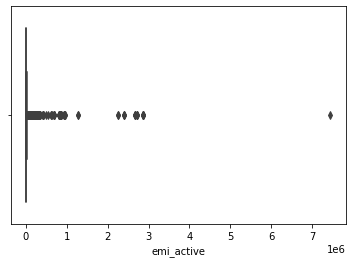

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


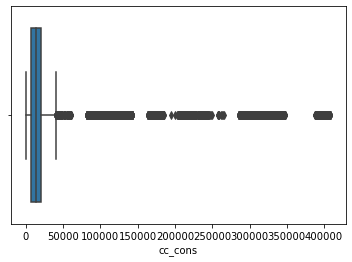

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


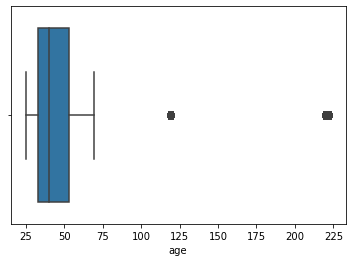

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


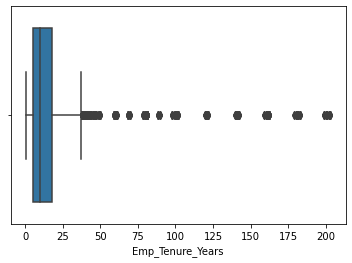

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


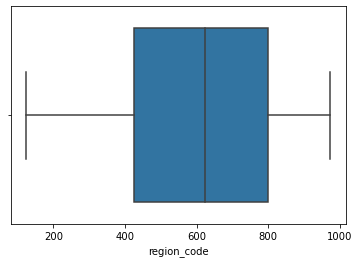

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


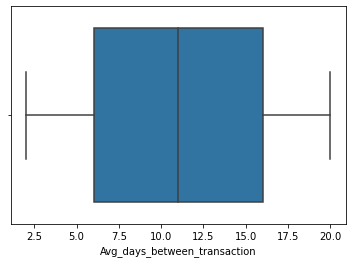

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


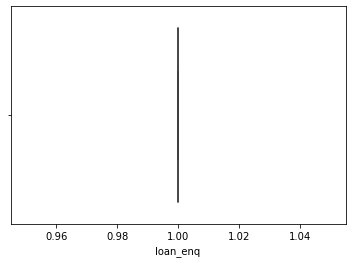

In [125]:
for i in df_num_train[1:]:
    sns.boxplot(df_num_train[i])
    plt.pause(.05)

In [126]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95), lower =x.quantile(0.05) )
    return x

In [127]:
df_num_train=df_num_train.apply(lambda x: outlier_capping(x))
df_num_test=df_num_test.apply(lambda x: outlier_capping(x))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


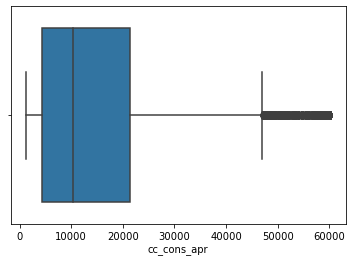

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


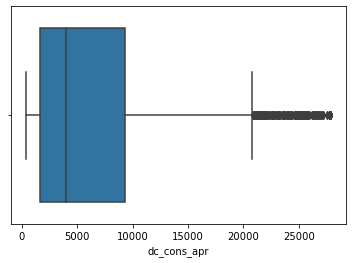

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


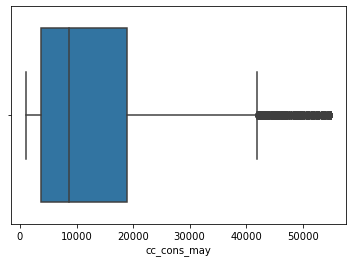

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


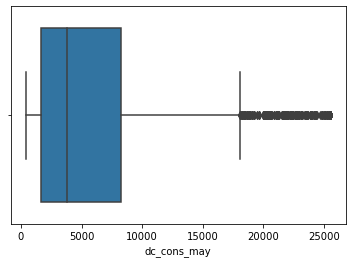

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


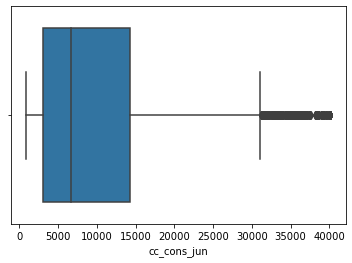

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


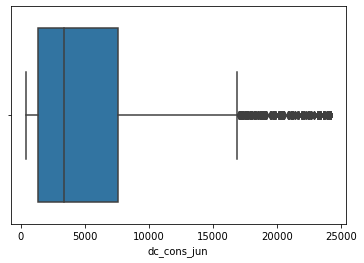

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


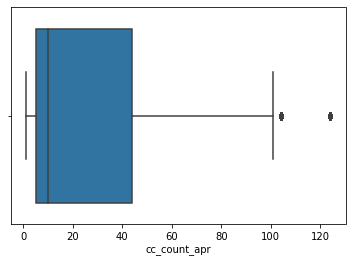

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


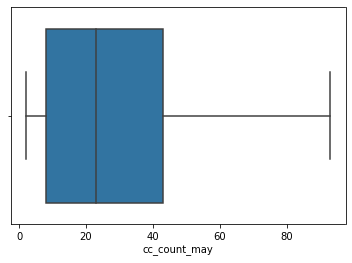

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


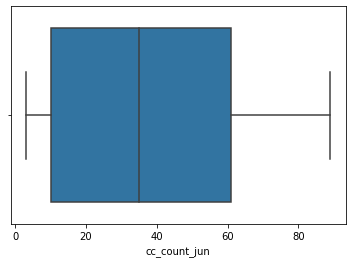

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


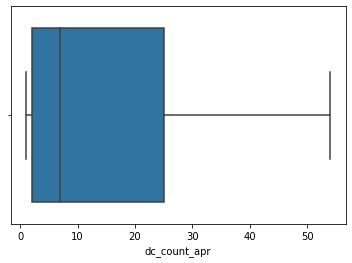

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


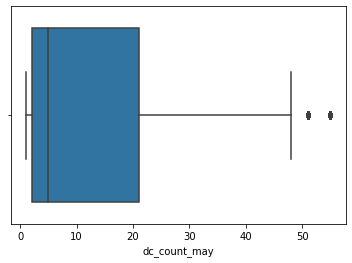

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


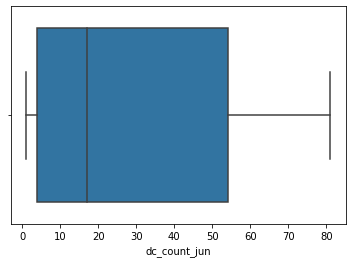

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


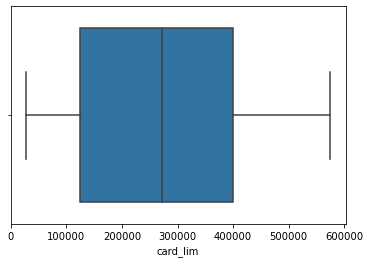

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


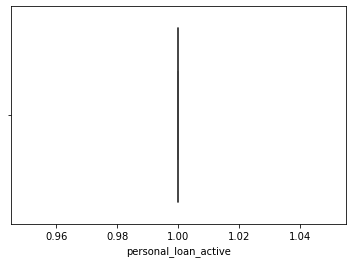

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


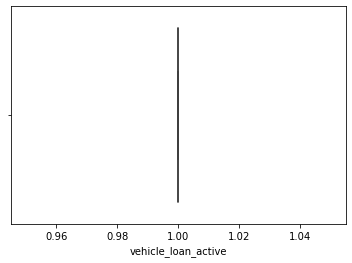

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


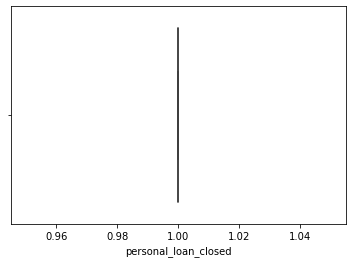

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


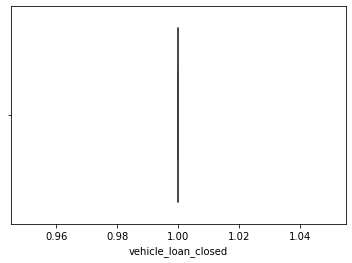

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


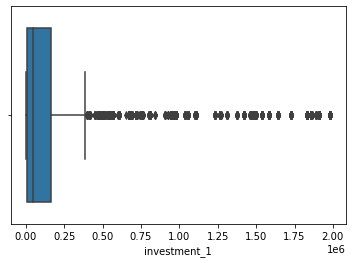

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


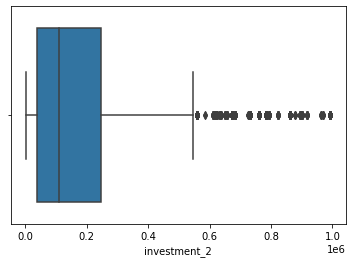

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


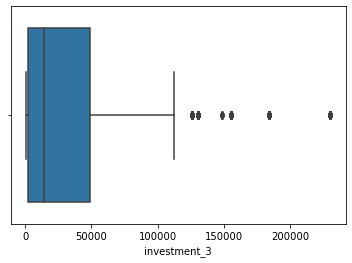

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


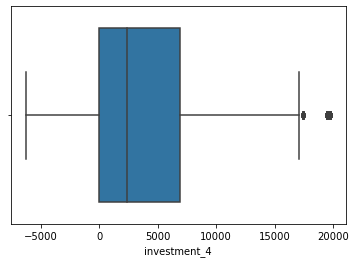

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


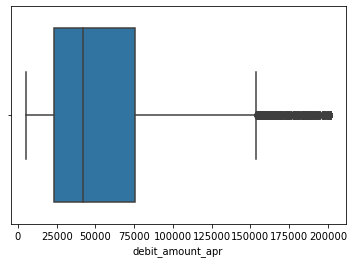

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


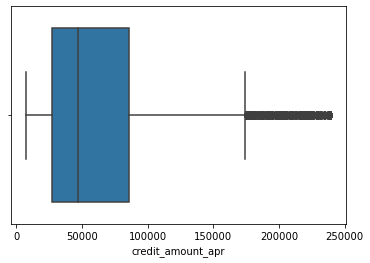

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


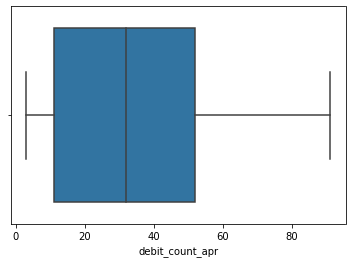

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


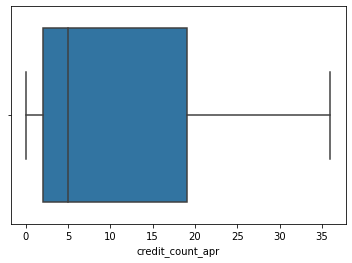

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


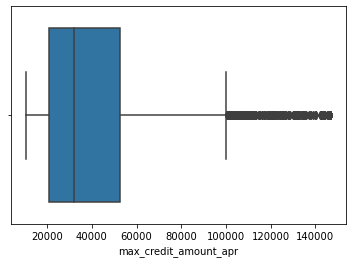

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


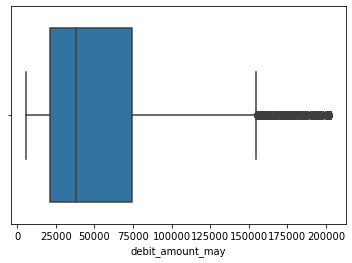

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


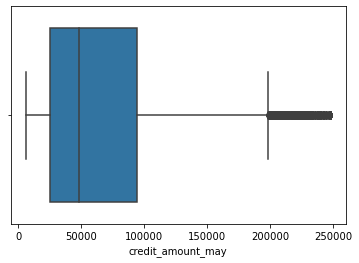

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


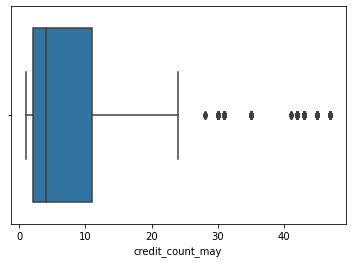

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


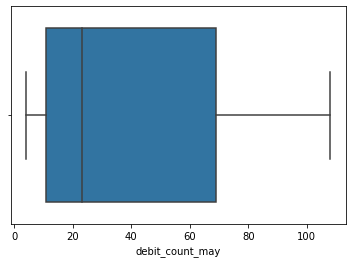

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


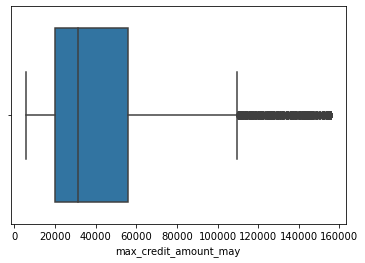

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


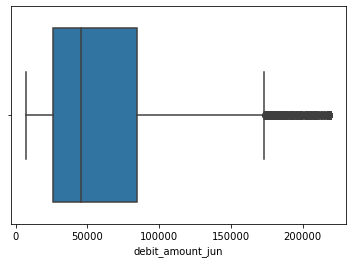

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


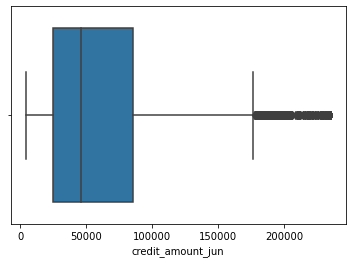

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


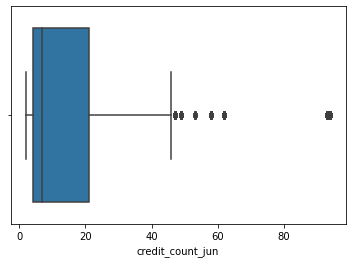

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


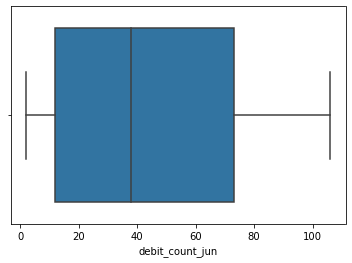

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


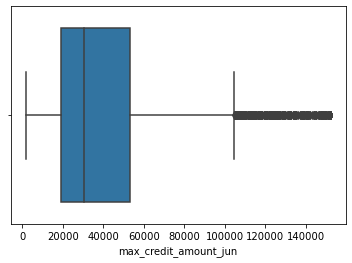

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


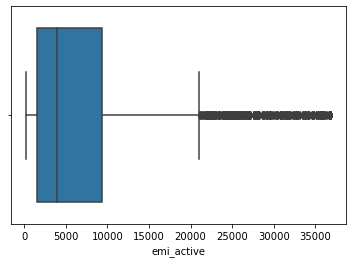

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


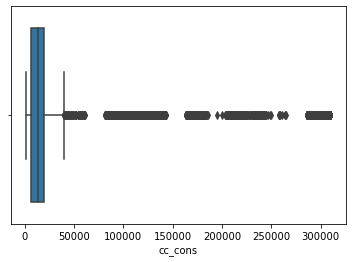

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


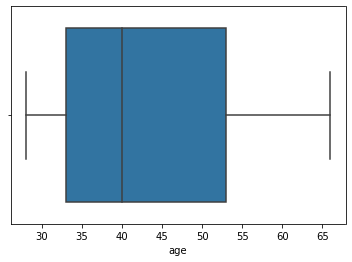

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


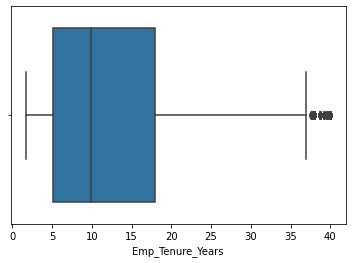

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


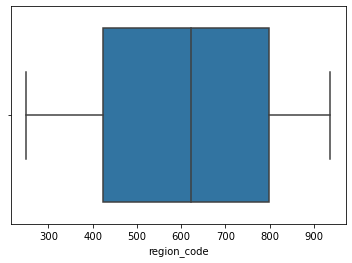

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


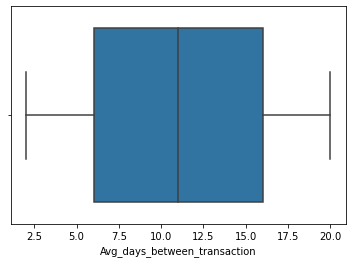

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


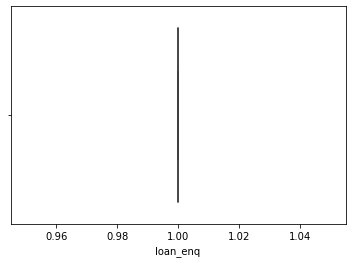

In [128]:
for i in df_num_train[1:]:
    sns.boxplot(df_num_train[i])
    plt.pause(.05)

In [129]:
data_new_train=pd.concat([df_num_train, df_cat_train], axis=1)
data_new_train

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,loan_enq,account_type_current,account_type_saving,gender_F,gender_M,Income_HIGH,Income_LOW,Income_MEDIUM,NetBanking_Flag,Tenure_with_Bank
0,3412.600,2909.34,1077.36,3084.50,4615.9700,6693.00,19.0,10.0,3.0,53.0,...,1,1,0,0,1,0,0,1,1,5
1,18133.760,3877.00,6123.78,5597.43,40123.5695,6117.00,4.0,60.0,3.0,4.0,...,1,1,0,0,1,0,1,0,1,8
2,6363.650,735.49,8799.00,13768.00,38266.0000,2638.00,2.0,83.0,47.0,4.0,...,1,1,0,0,1,0,0,1,1,3
3,12765.660,4429.16,16745.86,6360.00,29063.9700,3711.00,12.0,2.0,16.0,24.0,...,1,1,0,0,1,0,1,0,0,6
4,27819.700,1944.00,7006.50,2228.50,1096.2500,1065.00,15.0,13.0,61.0,7.0,...,1,0,1,0,1,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,10443.760,1218.85,7252.24,3873.00,6633.0000,10107.00,3.0,36.0,3.0,44.0,...,1,1,0,1,0,0,1,0,1,9
14996,29890.330,6308.00,16025.50,7610.00,2213.0800,841.60,1.0,34.0,4.0,7.0,...,1,1,0,0,1,0,0,1,1,9
14997,4148.980,948.74,19360.26,494.00,40123.5695,1801.77,57.0,23.0,61.0,24.0,...,1,1,0,0,1,0,0,1,1,9
14998,60157.139,7191.05,44341.13,25512.15,20679.0000,1010.00,7.0,93.0,44.0,3.0,...,1,1,0,0,1,0,0,1,1,10


In [130]:
data_new_test=pd.concat([df_num_test, df_cat_test], axis=1)
data_new_test

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,loan_enq,account_type_current,account_type_saving,gender_F,gender_M,Income_HIGH,Income_LOW,Income_MEDIUM,NetBanking_Flag,Tenure_with_Bank
15000,2795.450,1290.00,6141.05,676.50,9146.10000,15479.00,4.0,10.0,4.0,47.0,...,1,1,0,0,1,0,0,1,1,4
15001,29405.130,1640.00,1670.00,2463.92,10947.50000,956.00,3.0,10.0,4.0,50.0,...,1,1,0,0,1,0,0,1,0,6
15002,5985.200,6189.00,2696.09,766.00,812.95000,4133.22,7.0,30.0,5.0,24.0,...,1,1,0,0,1,0,1,0,1,10
15003,2105.930,18225.00,34763.56,410.90,4260.27000,20185.00,1.0,93.0,71.0,5.0,...,1,1,0,0,1,0,0,1,1,5
15004,3269.000,3532.00,3158.40,2699.77,3373.48000,5120.00,2.0,10.0,47.0,5.0,...,1,1,0,0,1,0,1,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4641.500,5979.58,6008.61,4410.00,39686.79025,1884.00,26.0,2.0,4.0,1.0,...,1,1,0,0,1,0,0,1,0,1
19996,4994.450,2805.37,23214.00,5870.00,1041.00000,1008.73,37.0,56.0,50.0,18.0,...,1,1,0,0,1,0,0,1,1,7
19997,3262.145,2871.00,7335.25,11774.04,4130.00000,1413.00,12.0,77.0,3.0,1.0,...,1,1,0,0,1,1,0,0,1,8
19998,12824.010,4866.00,12242.48,410.90,15132.77000,26187.25,67.0,2.0,4.0,1.0,...,1,1,0,0,1,0,0,1,0,4


<AxesSubplot:>

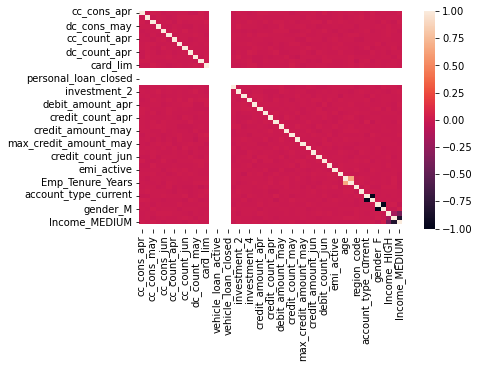

In [73]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_new_train.corr())

In [131]:
corr = data_new_train.corr()
corr.to_csv('corr.csv')

In [132]:
data_new_train.corr()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,loan_enq,account_type_current,account_type_saving,gender_F,gender_M,Income_HIGH,Income_LOW,Income_MEDIUM,NetBanking_Flag,Tenure_with_Bank
cc_cons_apr,1.000000,-0.003138,0.019288,0.003755,-0.007178,0.007019,-0.001911,-0.001355,0.009472,0.000211,...,NaN,-0.016921,0.016921,-0.007331,0.007331,-0.005702,-0.011904,0.014356,0.003644,-0.009045
dc_cons_apr,-0.003138,1.000000,-0.008390,-0.001744,-0.004082,0.000890,0.002944,0.004865,0.008419,0.003028,...,NaN,-0.004969,0.004969,0.000796,-0.000796,-0.003811,0.010765,-0.007911,-0.006421,-0.001636
cc_cons_may,0.019288,-0.008390,1.000000,-0.005469,-0.016803,-0.001975,-0.016210,0.010413,-0.007594,-0.006886,...,NaN,-0.002311,0.002311,-0.009935,0.009935,0.001213,-0.020337,0.018330,0.013655,0.010269
dc_cons_may,0.003755,-0.001744,-0.005469,1.000000,-0.005728,-0.003492,-0.002687,-0.013071,-0.014434,-0.020511,...,NaN,-0.002589,0.002589,0.005406,-0.005406,0.014040,-0.006246,-0.002099,0.004247,0.020881
cc_cons_jun,-0.007178,-0.004082,-0.016803,-0.005728,1.000000,-0.000064,0.000805,-0.007874,0.014454,-0.008608,...,NaN,0.015182,-0.015182,-0.007928,0.007928,0.009254,-0.000517,-0.004750,-0.003079,-0.012479
dc_cons_jun,0.007019,0.000890,-0.001975,-0.003492,-0.000064,1.000000,-0.010379,0.000097,0.006437,-0.000749,...,NaN,-0.000655,0.000655,-0.008504,0.008504,0.005364,0.002806,-0.005657,0.003712,-0.009901
cc_count_apr,-0.001911,0.002944,-0.016210,-0.002687,0.000805,-0.010379,1.000000,0.001965,0.002973,-0.007826,...,NaN,0.005573,-0.005573,-0.007408,0.007408,-0.000130,-0.000924,0.000938,0.008548,0.006829
cc_count_may,-0.001355,0.004865,0.010413,-0.013071,-0.007874,0.000097,0.001965,1.000000,-0.001485,0.005692,...,NaN,0.000713,-0.000713,0.005054,-0.005054,-0.004057,0.005663,-0.003002,0.013307,-0.011014
cc_count_jun,0.009472,0.008419,-0.007594,-0.014434,0.014454,0.006437,0.002973,-0.001485,1.000000,-0.000027,...,NaN,0.017982,-0.017982,-0.010211,0.010211,0.000817,0.010657,-0.010427,-0.003512,-0.004438
dc_count_apr,0.000211,0.003028,-0.006886,-0.020511,-0.008608,-0.000749,-0.007826,0.005692,-0.000027,1.000000,...,NaN,-0.012891,0.012891,-0.006800,0.006800,-0.013345,0.005486,0.002416,0.009756,0.002376


# variable reduction (feature selection/reduction)

In [133]:
from pandas import Series, DataFrame
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import  BaggingRegressor,RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor



In [76]:
data_new_train.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons',
       'age', 'Emp_Tenure_Years', 'region_code',
       'Avg_days_between_transaction', 'account_type_current',
       'account_type_saving', 'gender_F', 'gender_M', 'Income_HIGH',
       'Income_LOW', 'Income_MEDIUM', 'loan_en

# RFE

In [134]:
from sklearn.preprocessing import StandardScaler

In [83]:

# Defining X and Y variables and converting them into numpy arrays 
X_train=data_new_train.drop('cc_cons', axis=1)
X=StandardScaler().fit_transform(X_train)
Y=data_new_train.cc_cons.values.reshape(-1, 1)

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=15)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
x=data_new_train.drop('cc_cons', axis=1)
imp_vars_RFE=x.columns[(fit.support_)]

In [ ]:
imp_vars_RFE

# Select KBest

In [135]:
X = data_new_train[data_new_train.columns.difference(['cc_cons'])]
SKB = SelectKBest(f_regression, k=15).fit(X, data_new_train[['cc_cons']] )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


In [136]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [137]:
imp_vars_SKB

['Emp_Tenure_Years',
 'Tenure_with_Bank',
 'cc_cons_may',
 'cc_count_may',
 'credit_amount_apr',
 'credit_count_may',
 'dc_cons_may',
 'dc_count_jun',
 'dc_count_may',
 'emi_active',
 'investment_1',
 'investment_3',
 'max_credit_amount_apr',
 'max_credit_amount_jun',
 'region_code']

In [93]:
['Emp_Tenure_Years',
 'Tenure_with_Bank',
 'age',
 'cc_cons_may',
 'cc_count_apr',
 'cc_count_may',
 'credit_amount_apr',
 'credit_count_may',
 'dc_cons_may',
 'dc_count_may',
 'emi_active',
 'investment_3',
 'max_credit_amount_jun',
 'max_credit_amount_may',
 'region_code']
      
['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'debit_amount_apr', 'credit_amount_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'max_credit_amount_jun', 'emi_active'

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_480/317557703.py, line 21)

In [138]:
data_new_train.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons',
       'age', 'Emp_Tenure_Years', 'region_code',
       'Avg_days_between_transaction', 'loan_enq', 'account_type_current',
       'account_type_saving', 'gender_F', 'gender_M', 'Income_HIGH',
       'Income_LOW', 'Income_MEDIU

In [139]:
final_features=data_new_train[['cc_cons_may', 'credit_amount_apr','emi_active','max_credit_amount_apr',
                               'max_credit_amount_may','max_credit_amount_jun', 'Emp_Tenure_Years','Tenure_with_Bank', 'age',
                               'cc_count_apr', 'cc_count_may','credit_count_may','dc_cons_may','dc_cons_apr',
                               'dc_cons_jun','dc_count_may', 'investment_3','debit_amount_may', 'credit_amount_may',
                               'debit_amount_jun', 'credit_amount_jun']]

In [140]:
final_features.columns

Index(['cc_cons_may', 'credit_amount_apr', 'emi_active',
       'max_credit_amount_apr', 'max_credit_amount_may',
       'max_credit_amount_jun', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'age',
       'cc_count_apr', 'cc_count_may', 'credit_count_may', 'dc_cons_may',
       'dc_cons_apr', 'dc_cons_jun', 'dc_count_may', 'investment_3',
       'debit_amount_may', 'credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun'],
      dtype='object')

In [141]:
#Commone Features from Select Kbest and RFE
Common_features=data_new_train[['cc_cons_may', 'credit_amount_apr','emi_active','max_credit_amount_may',
                                 'max_credit_amount_jun']]

In [142]:
X_new = final_features
### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [143]:
vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
8,16.757573,age
6,4.695569,Emp_Tenure_Years
7,4.247552,Tenure_with_Bank
3,2.475435,max_credit_amount_apr
4,2.304387,max_credit_amount_may
19,2.262489,debit_amount_jun
5,2.235496,max_credit_amount_jun
1,2.199351,credit_amount_apr
20,2.151232,credit_amount_jun
18,2.145115,credit_amount_may


removing age from the list of final features

In [144]:
final_features=data_new_train[['cc_cons_may', 'credit_amount_apr','emi_active','max_credit_amount_apr',
                               'max_credit_amount_may','max_credit_amount_jun', 'Emp_Tenure_Years','Tenure_with_Bank',
                               'cc_count_apr', 'cc_count_may','credit_count_may','dc_cons_may','dc_cons_apr',
                               'dc_cons_jun','dc_count_may', 'investment_3','debit_amount_may', 'credit_amount_may',
                               'debit_amount_jun', 'credit_amount_jun']]

y_train=data_new_train[['cc_cons']]

In [145]:
X_new = final_features
### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [146]:
vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
7,3.982743,Tenure_with_Bank
3,2.416810,max_credit_amount_apr
6,2.394257,Emp_Tenure_Years
4,2.259692,max_credit_amount_may
18,2.220741,debit_amount_jun
5,2.195161,max_credit_amount_jun
1,2.157939,credit_amount_apr
19,2.111285,credit_amount_jun
17,2.105374,credit_amount_may
16,2.089694,debit_amount_may


In [147]:
data_final_train1=pd.concat([final_features, y_train], axis=1)

In [148]:
data_final_train1.columns

Index(['cc_cons_may', 'credit_amount_apr', 'emi_active',
       'max_credit_amount_apr', 'max_credit_amount_may',
       'max_credit_amount_jun', 'Emp_Tenure_Years', 'Tenure_with_Bank',
       'cc_count_apr', 'cc_count_may', 'credit_count_may', 'dc_cons_may',
       'dc_cons_apr', 'dc_cons_jun', 'dc_count_may', 'investment_3',
       'debit_amount_may', 'credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'cc_cons'],
      dtype='object')

In [149]:
data_final_test1=data_new_test[['cc_cons_may', 'credit_amount_apr', 'emi_active',
       'max_credit_amount_apr', 'max_credit_amount_may',
       'max_credit_amount_jun', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'age',
       'cc_count_apr', 'cc_count_may', 'credit_count_may', 'dc_cons_may',
       'dc_cons_apr', 'dc_cons_jun', 'dc_count_may', 'investment_3',
       'debit_amount_may', 'credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun']]

In [150]:
data_final_train1

,cc_cons_may,credit_amount_apr,emi_active,max_credit_amount_apr,max_credit_amount_may,max_credit_amount_jun,Emp_Tenure_Years,Tenure_with_Bank,cc_count_apr,cc_count_may,...,dc_cons_may,dc_cons_apr,dc_cons_jun,dc_count_may,investment_3,debit_amount_may,credit_amount_may,debit_amount_jun,credit_amount_jun,cc_cons
0,1077.36,27532.3700,3448.8400,28579.0,97916.00,19947.00,7.0,5,19.0,10.0,...,3084.50,2909.34,6693.00,1.0,230000.0,44974.63,42852.00,45253.640,47635.0000,13434.00
1,6123.78,50784.0000,3812.6900,25379.0,25125.00,20585.00,10.2,8,4.0,60.0,...,5597.43,3877.00,6117.00,1.0,230000.0,117575.67,24257.00,12912.330,18369.0000,1290.85
2,8799.00,26345.0000,9432.9000,19224.0,38546.00,13950.00,3.9,3,2.0,83.0,...,13768.00,735.49,2638.00,55.0,2156.0,14646.35,38306.00,93567.510,26713.0000,11968.00
3,16745.86,49660.0000,198.9805,72186.0,155502.75,37018.00,25.8,6,12.0,2.0,...,6360.00,4429.16,3711.00,12.0,26241.0,14719.00,46132.05,176394.480,35062.7400,32029.00
4,7006.50,239143.4685,1887.8900,18867.0,13480.00,24274.00,6.5,7,15.0,13.0,...,2228.50,1944.00,1065.00,5.0,13873.0,189938.76,37191.00,7196.425,19056.0000,16394.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,7252.24,31135.0000,36788.7500,27608.0,6936.00,82851.00,13.2,9,3.0,36.0,...,3873.00,1218.85,10107.00,55.0,16215.0,30501.77,23692.00,219329.280,42625.5000,4263.00
14996,16025.50,23797.0000,4762.1000,30512.0,155502.75,118110.47,2.4,9,1.0,34.0,...,7610.00,6308.00,841.60,1.0,12337.0,57918.69,50023.00,8666.010,34987.5500,11019.00
14997,19360.26,95477.2700,2877.3300,41085.0,44421.00,49545.00,3.4,9,57.0,23.0,...,494.00,948.74,1801.77,3.0,25000.0,25404.75,35239.00,97896.480,234766.7625,309852.00
14998,44341.13,59644.0000,13006.8400,19110.0,22409.00,16130.00,40.0,10,7.0,93.0,...,25512.15,7191.05,1010.00,9.0,3975.0,46086.90,82193.00,22693.920,33025.2900,28813.00


Checking the distribution of y and transforming the Y variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

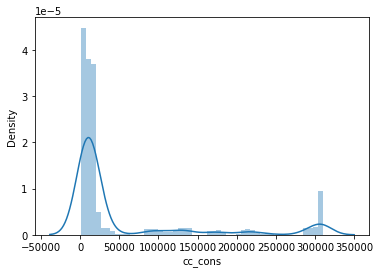

In [172]:
sns.distplot(data_final_train1['cc_cons'])

In [163]:
y_vars=np.log(data_final_train1['cc_cons'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

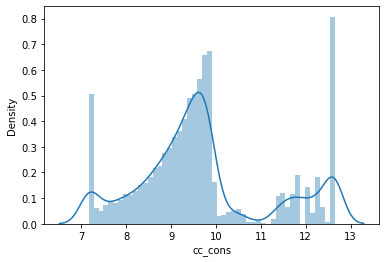

In [173]:
sns.distplot(y_vars)

# Relative Feature Importance using Decision Trees

In [165]:
X = data_final_train1.drop('cc_cons',axis=1).values
y = y_vars.values

In [166]:
X_train_data=data_final_train1.drop('cc_cons',axis=1)
y_actual=y_vars

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [168]:
X_train_data

,cc_cons_may,credit_amount_apr,emi_active,max_credit_amount_apr,max_credit_amount_may,max_credit_amount_jun,Emp_Tenure_Years,Tenure_with_Bank,cc_count_apr,cc_count_may,credit_count_may,dc_cons_may,dc_cons_apr,dc_cons_jun,dc_count_may,investment_3,debit_amount_may,credit_amount_may,debit_amount_jun,credit_amount_jun
0,1077.36,27532.3700,3448.8400,28579.0,97916.00,19947.00,7.0,5,19.0,10.0,1.0,3084.50,2909.34,6693.00,1.0,230000.0,44974.63,42852.00,45253.640,47635.0000
1,6123.78,50784.0000,3812.6900,25379.0,25125.00,20585.00,10.2,8,4.0,60.0,1.0,5597.43,3877.00,6117.00,1.0,230000.0,117575.67,24257.00,12912.330,18369.0000
2,8799.00,26345.0000,9432.9000,19224.0,38546.00,13950.00,3.9,3,2.0,83.0,47.0,13768.00,735.49,2638.00,55.0,2156.0,14646.35,38306.00,93567.510,26713.0000
3,16745.86,49660.0000,198.9805,72186.0,155502.75,37018.00,25.8,6,12.0,2.0,43.0,6360.00,4429.16,3711.00,12.0,26241.0,14719.00,46132.05,176394.480,35062.7400
4,7006.50,239143.4685,1887.8900,18867.0,13480.00,24274.00,6.5,7,15.0,13.0,2.0,2228.50,1944.00,1065.00,5.0,13873.0,189938.76,37191.00,7196.425,19056.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,7252.24,31135.0000,36788.7500,27608.0,6936.00,82851.00,13.2,9,3.0,36.0,1.0,3873.00,1218.85,10107.00,55.0,16215.0,30501.77,23692.00,219329.280,42625.5000
14996,16025.50,23797.0000,4762.1000,30512.0,155502.75,118110.47,2.4,9,1.0,34.0,4.0,7610.00,6308.00,841.60,1.0,12337.0,57918.69,50023.00,8666.010,34987.5500
14997,19360.26,95477.2700,2877.3300,41085.0,44421.00,49545.00,3.4,9,57.0,23.0,43.0,494.00,948.74,1801.77,3.0,25000.0,25404.75,35239.00,97896.480,234766.7625
14998,44341.13,59644.0000,13006.8400,19110.0,22409.00,16130.00,40.0,10,7.0,93.0,3.0,25512.15,7191.05,1010.00,9.0,3975.0,46086.90,82193.00,22693.920,33025.2900


In [169]:
rgr_tree = DecisionTreeRegressor( max_depth = 3, max_features=3)
rgr_tree.fit( X_train, y_train )

DecisionTreeRegressor(max_depth=3, max_features=3)

In [170]:
rgr_tree.feature_importances_

array([0.        , 0.        , 0.46015179, 0.        , 0.        ,
       0.08710981, 0.11541183, 0.        , 0.        , 0.        ,
       0.        , 0.19196421, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.14536236, 0.        , 0.        ])

In [171]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train_data.columns, rgr_tree.feature_importances_)]

feature_map

[('cc_cons_may', 0.0),
 ('credit_amount_apr', 0.0),
 ('emi_active', 0.460151794611016),
 ('max_credit_amount_apr', 0.0),
 ('max_credit_amount_may', 0.0),
 ('max_credit_amount_jun', 0.08710980790655802),
 ('Emp_Tenure_Years', 0.11541182863412476),
 ('Tenure_with_Bank', 0.0),
 ('cc_count_apr', 0.0),
 ('cc_count_may', 0.0),
 ('credit_count_may', 0.0),
 ('dc_cons_may', 0.19196421031122998),
 ('dc_cons_apr', 0.0),
 ('dc_cons_jun', 0.0),
 ('dc_count_may', 0.0),
 ('investment_3', 0.0),
 ('debit_amount_may', 0.0),
 ('credit_amount_may', 0.1453623585370712),
 ('debit_amount_jun', 0.0),
 ('credit_amount_jun', 0.0)]

In [77]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance.head(30)

,Feature,importance
1,credit_amount_apr,0.322384
0,cc_cons_may,0.246026
5,max_credit_amount_jun,0.189049
15,investment_3,0.136197
18,debit_amount_jun,0.106343
11,dc_cons_may,0.000000
17,credit_amount_may,0.000000
16,debit_amount_may,0.000000
14,dc_count_may,0.000000
13,dc_cons_jun,0.000000


In [ ]:
#Commone Features from Select Kbest and RFE
Common_features=data_new_train[['cc_cons_may', 'credit_amount_apr','emi_active','max_credit_amount_may',
                                 'max_credit_amount_jun']]

In [174]:
# after going through the feature importance techniques, taking the final list of features as

final_features=data_new_train[['cc_cons_may', 'credit_amount_apr','investment_3','debit_amount_jun','max_credit_amount_jun',
                              'cc_cons']]

In [207]:
final_features

,cc_cons_may,credit_amount_apr,investment_3,debit_amount_jun,max_credit_amount_jun,cc_cons
0,1077.36,27532.3700,230000.0,45253.640,19947.00,13434.00
1,6123.78,50784.0000,230000.0,12912.330,20585.00,1290.85
2,8799.00,26345.0000,2156.0,93567.510,13950.00,11968.00
3,16745.86,49660.0000,26241.0,176394.480,37018.00,32029.00
4,7006.50,239143.4685,13873.0,7196.425,24274.00,16394.00
...,...,...,...,...,...,...
14995,7252.24,31135.0000,16215.0,219329.280,82851.00,4263.00
14996,16025.50,23797.0000,12337.0,8666.010,118110.47,11019.00
14997,19360.26,95477.2700,25000.0,97896.480,49545.00,309852.00
14998,44341.13,59644.0000,3975.0,22693.920,16130.00,28813.00


# Running the model with Linear Regression

In [237]:
#taking the logged value of
X = final_features.drop('cc_cons',axis=1).values
y = y_vars.values

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [239]:
y_train

array([ 9.31829751, 11.79045114, 12.02862519, ...,  8.44246965,
       10.40049819, 12.64385004])

In [240]:
linreg=LinearRegression()

In [241]:
linreg.fit(X_train,y_train)

LinearRegression()

In [242]:
y_pred_tst=linreg.predict(X_test)
y_pred_train=linreg.predict(X_train)

In [243]:
y_test_org=np.exp(y_test)
y_train_org=np.exp(y_train)

In [244]:
y_train_org

array([ 11140., 131986., 167481., ...,   4640.,  32876., 309852.])

In [245]:
rmspe_lm_tst =(np.sqrt(np.mean(np.square((y_test_org - y_pred_tst) /y_test_org)))) * 100

In [246]:
rmspe_lm_tst

99.85758224922816

In [247]:
rmspe_lm_train =(np.sqrt(np.mean(np.square((y_train_org - y_pred_train) /y_train_org)))) * 100

In [248]:
rmspe_lm_train

99.86322863004473

In [249]:
from sklearn.metrics import r2_score
r2_score(y_train_org,y_pred_train)

-0.3357356743362936

In [250]:
r2_score(y_test_org, y_pred_tst)

-0.3417752716251299

# Decision Tree Model with Parameter Tuning

In [251]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [252]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5)
tree.fit( X_train, y_train )

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])})

In [253]:
tree.best_score_

-0.004499272887021765

In [254]:
tree.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features=3)

In [255]:
tree.best_params_

{'max_depth': 3, 'max_features': 3}

In [256]:
rgr_tree = DecisionTreeRegressor( max_depth = 3, max_features=3)
rgr_tree.fit( X_train, y_train )

DecisionTreeRegressor(max_depth=3, max_features=3)

In [257]:
y_predicted_dt_tst=tree.predict(X_test)

In [258]:
y_pred_dt_train=tree.predict(X_train)

In [259]:
rmspe_dt_tst =(np.sqrt(np.mean(np.square((y_test_org - y_predicted_dt_tst) / y_test_org)))) * 100

In [260]:
rmspe_dt_tst

99.85760620102403

In [261]:
rmspe_dt_train =(np.sqrt(np.mean(np.square((y_train_org - y_pred_dt_train) / y_train_org)))) * 100

In [262]:
rmspe_dt_train

99.8633029611773

#  Predicting the missing values in the test data set

In [266]:
X_data_tst=df_test
X_data_tst

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,...,1170.49,current,M,37,MEDIUM,11.9,4,575.0,1,16.000000
15001,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,...,16447.45,current,M,33,MEDIUM,7.8,6,394.0,0,19.000000
15002,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,24,...,2622.28,current,M,53,LOW,33.0,10,324.0,1,15.000000
15003,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,...,340.79,current,M,33,MEDIUM,7.8,5,370.0,1,7.000000
15004,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,...,2812.20,current,M,62,LOW,12.6,9,505.0,1,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,...,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.000000
19996,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,...,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.000000
19997,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,...,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.000000
19998,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,...,59.29,current,M,34,MEDIUM,12.6,4,882.0,0,13.000000


In [268]:
# selecting the final features as same before in the test dataset to predict the missing values of y

final_features1=X_data_tst[['cc_cons_may', 'credit_amount_apr','investment_3','debit_amount_jun','max_credit_amount_jun']]

In [269]:
final_features1

,cc_cons_may,credit_amount_apr,investment_3,debit_amount_jun,max_credit_amount_jun
15000,6141.05,44341.00,1633.0,30527.88,25945.92
15001,1670.00,21946.00,891.0,14342.83,12214.00
15002,2696.09,36616.50,54101.0,32503.16,13215.00
15003,34763.56,43173.38,5905.0,93572.42,72317.00
15004,3158.40,15232.00,130000.0,19011.50,42344.00
...,...,...,...,...,...
19995,6008.61,37646.41,492.0,105488.53,58037.00
19996,23214.00,1605.00,10271.0,77112.66,24110.00
19997,7335.25,80044.00,30000.0,57192.48,1769.00
19998,12242.48,66057.00,925.0,82039.00,37255.00


In [270]:
cc_cons_tst=linreg.predict(final_features1)

In [271]:
cc_cons_tst

array([9.68740868, 9.67146072, 9.64758392, ..., 9.68088214, 9.69750042,
       9.68577986])